# Bank Client Attributes and Marketing Outcomes - Supervised Learning

## 1. Data Understanding

In [859]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


import warnings
warnings.filterwarnings("ignore")

In [860]:
df = pd.read_csv('./Assignment-2_Data.csv', index_col=0)

In [861]:
print("Number of rows:", df.shape[0])

Number of rows: 45211


In [862]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
Id,,,,,,,,,,,,,,,,,
1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [863]:
# To see null counts and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 1001 to 46211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45199 non-null  float64
 1   job        45210 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45208 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 6.2+ MB


In [864]:
# Checking the amount of missing values in each column
df.isna().sum()

age          12
job           1
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [865]:
# Display the value counts of categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"--- {col.upper()} ---")
    print(df[col].value_counts().to_string(), end="\n\n")


--- JOB ---
job
blue-collar      9732
management       9458
technician       7596
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288

--- MARITAL ---
marital
married     27214
single      12790
divorced     5207

--- EDUCATION ---
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857

--- DEFAULT ---
default
no     44396
yes      815

--- HOUSING ---
housing
yes    25130
no     20081

--- LOAN ---
loan
no     37967
yes     7244

--- CONTACT ---
contact
cellular     29285
unknown      13020
telephone     2906

--- MONTH ---
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214

--- POUTCOME ---
poutcome
unknown    36959
failure     4901
other       1840
success     1511

--- Y ---
y
no     39922
yes     5

In [866]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45199.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.933627,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.623149,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 2. Data Analysis

### 2.1 Distribution of Age

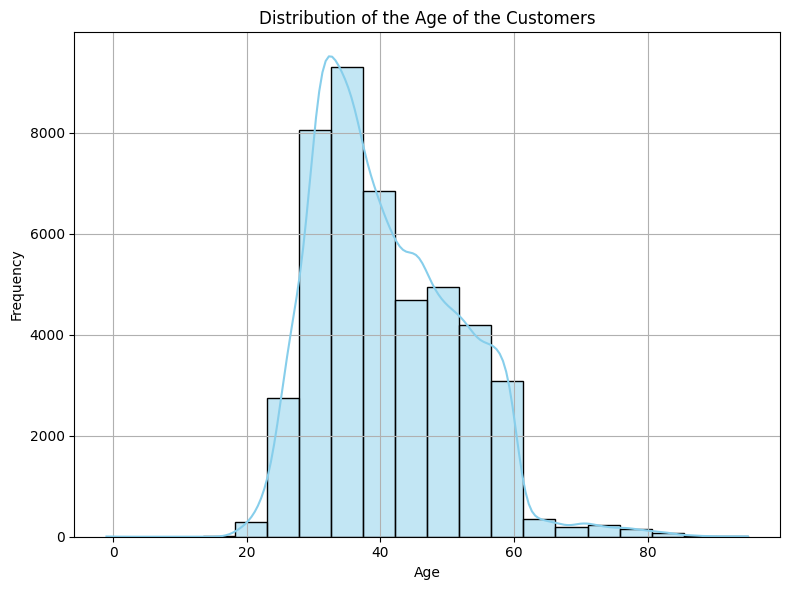

In [867]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue') # type: ignore
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of the Age of the Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

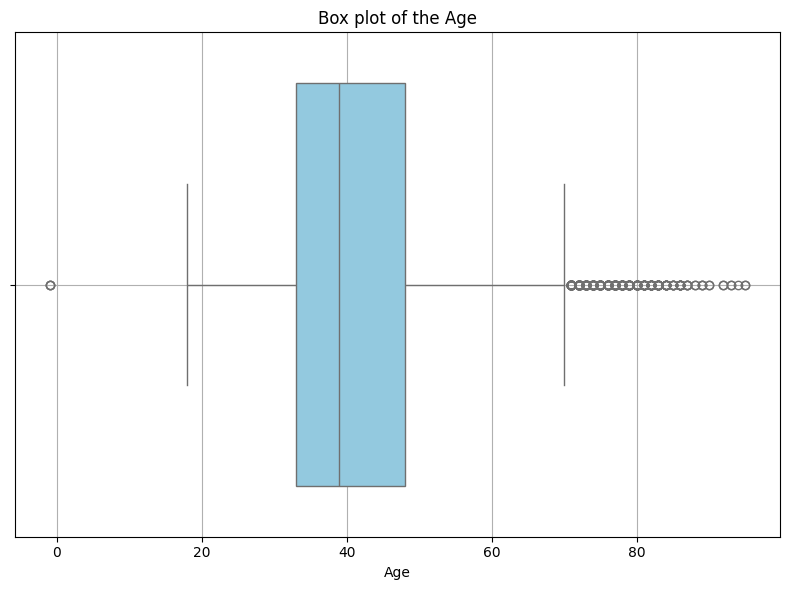

In [868]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'], color='skyblue')
plt.xlabel('Age')
plt.title('Box plot of the Age')
plt.grid(True)
plt.tight_layout()
plt.show()

There's a -1 age value

### 2.2 Distribution of Balance

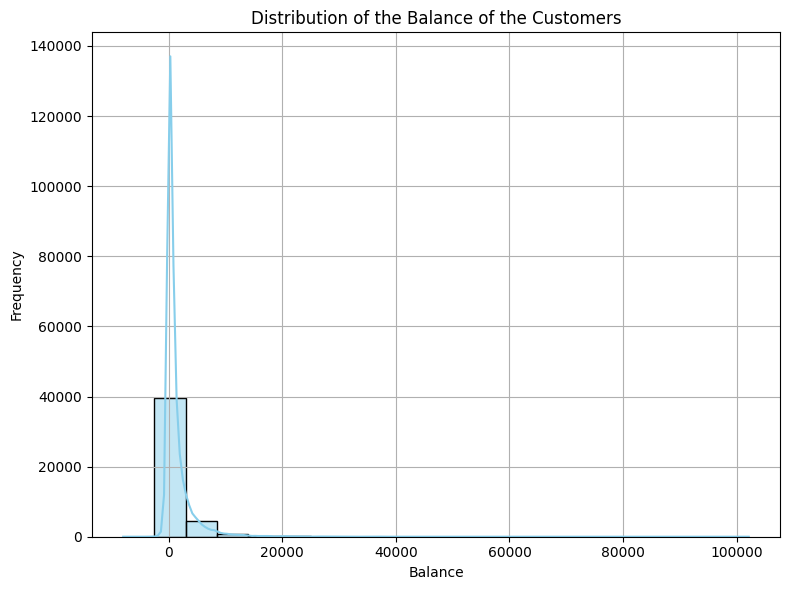

In [869]:
# Histogram of Balance
plt.figure(figsize=(8, 6))
sns.histplot(df['balance'], bins=20, kde=True, color='skyblue') # type: ignore
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of the Balance of the Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

There are lots of 0 values, 40.000/45211

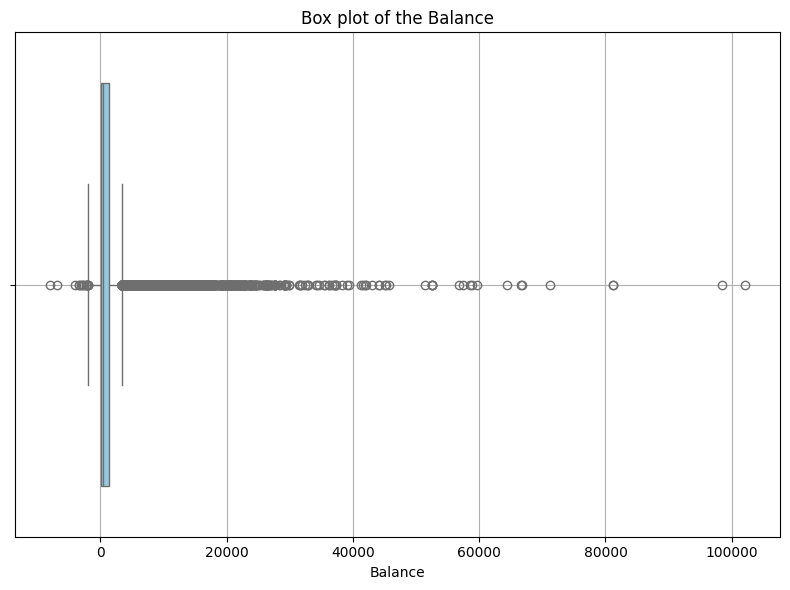

In [870]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['balance'], color='skyblue')
plt.xlabel('Balance')
plt.title('Box plot of the Balance')
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3 Visualization of Categorical Variables

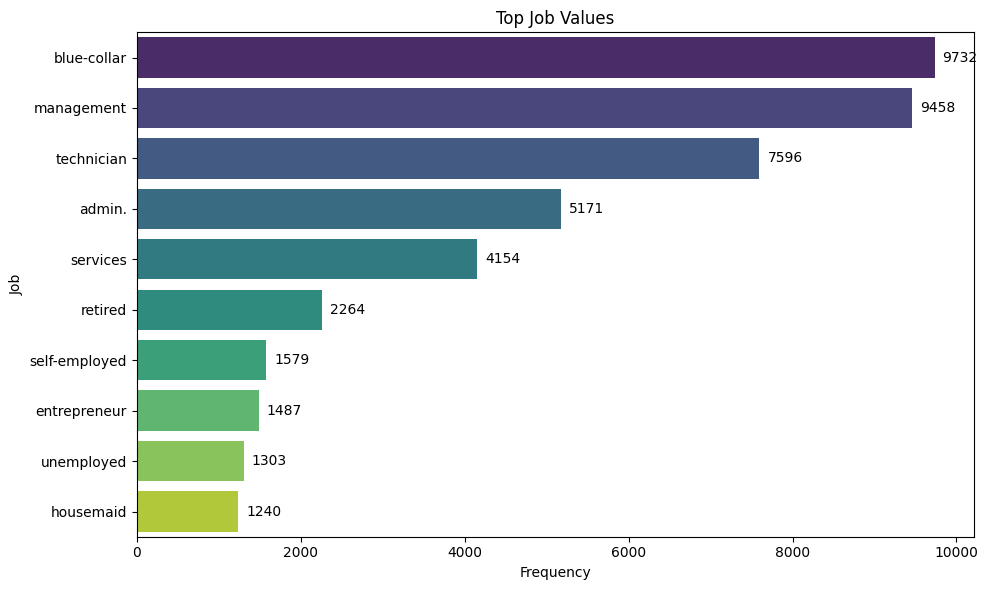

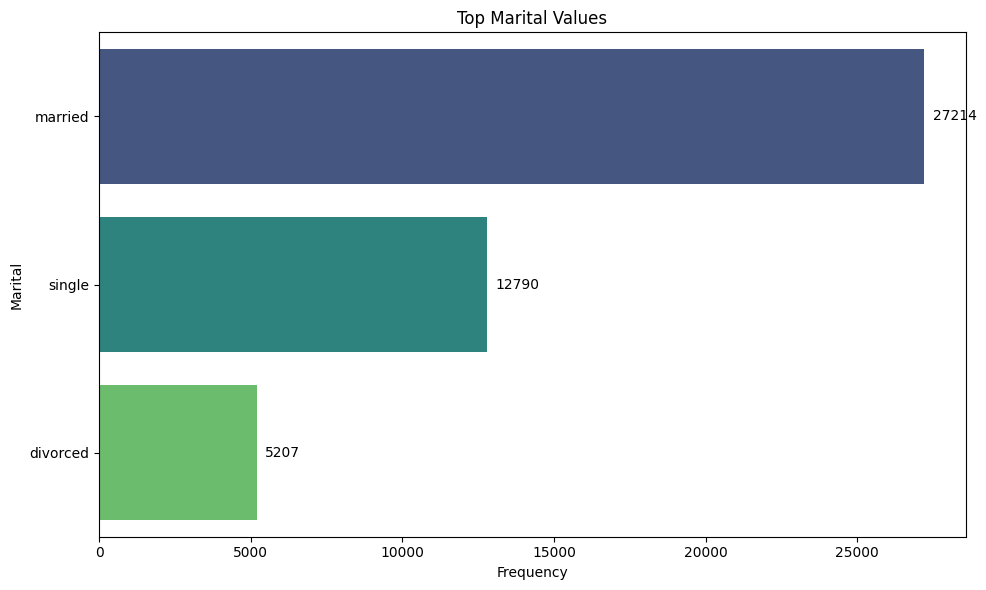

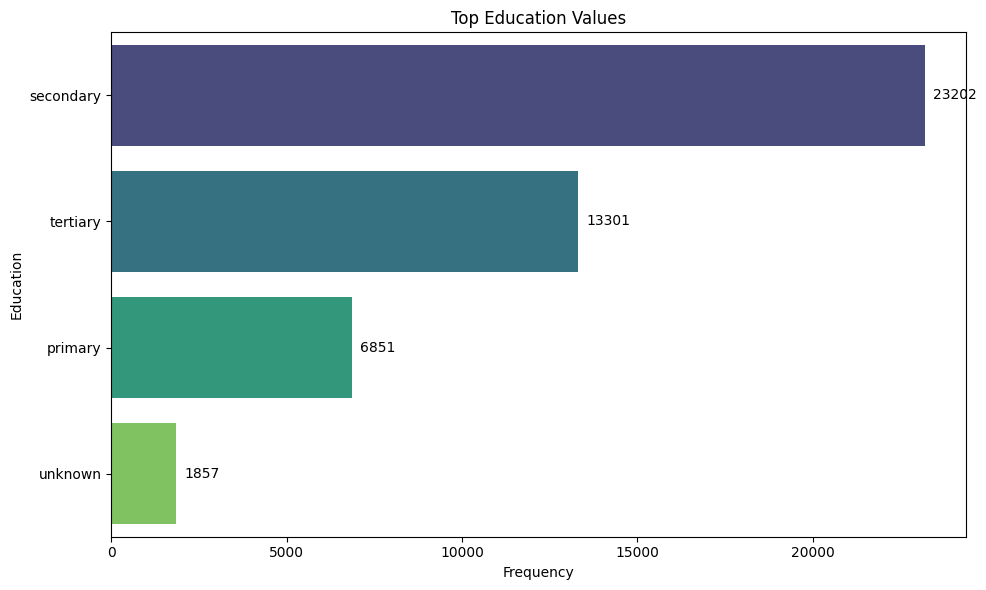

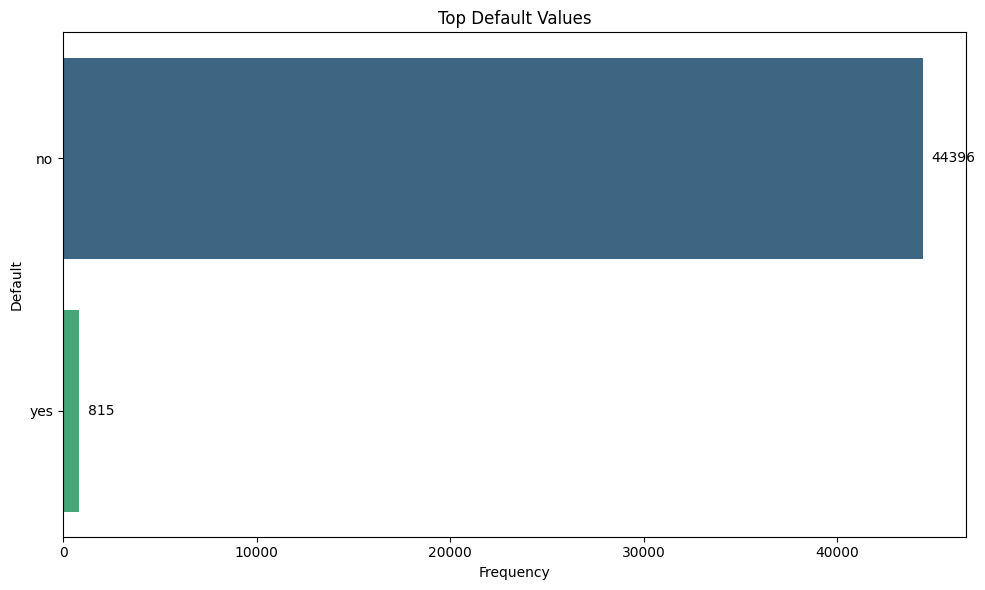

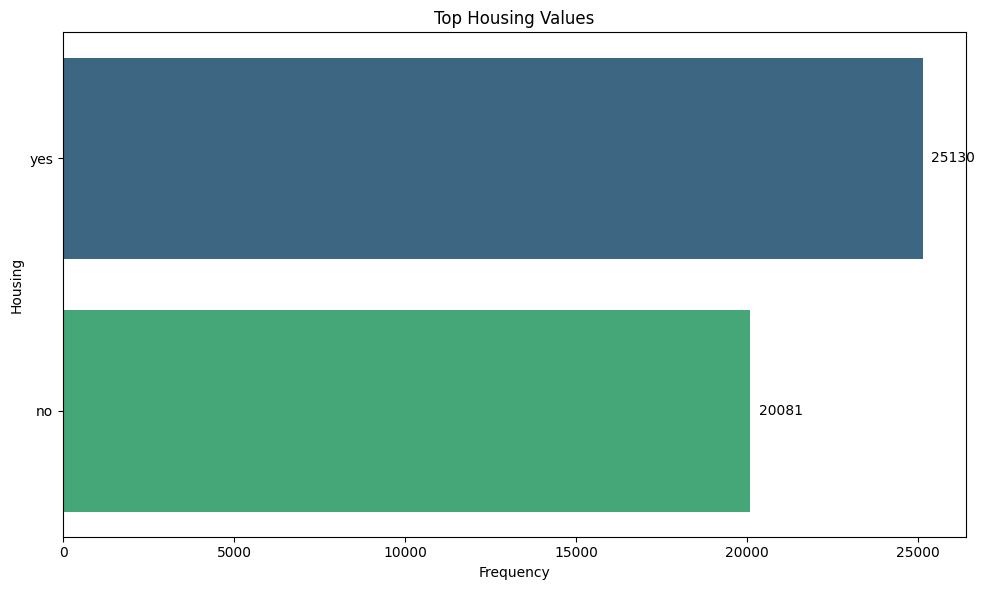

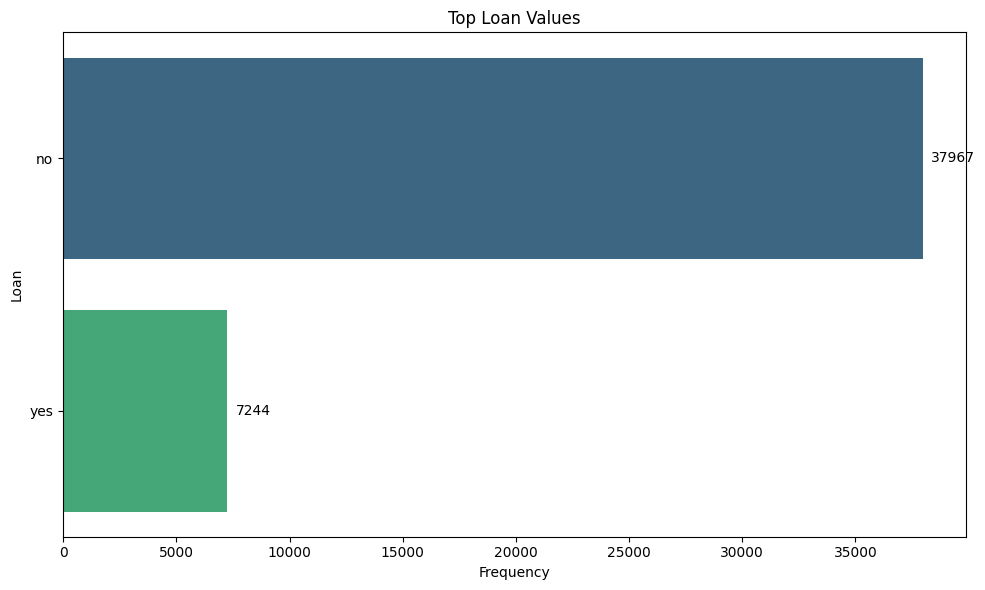

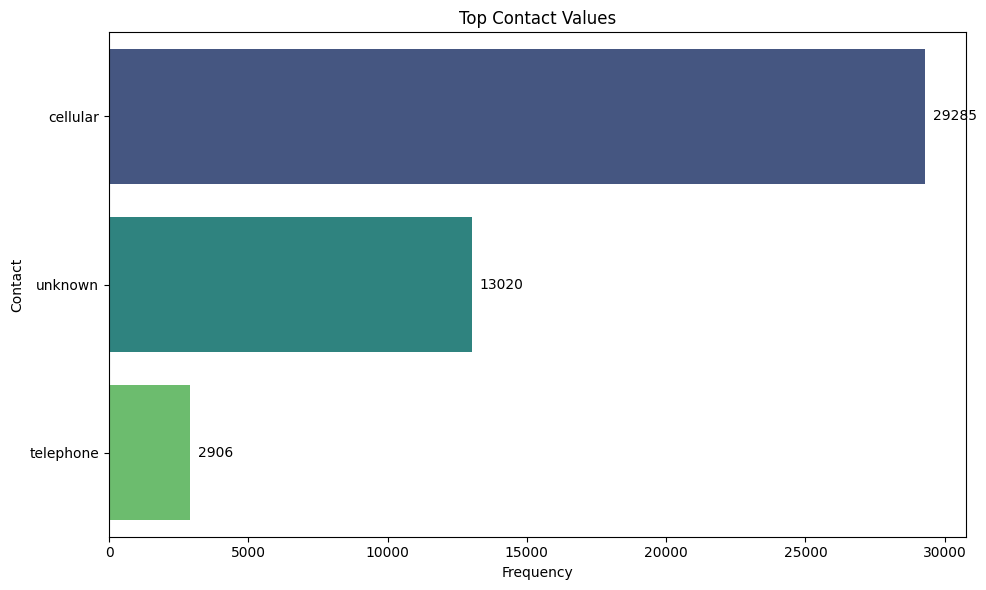

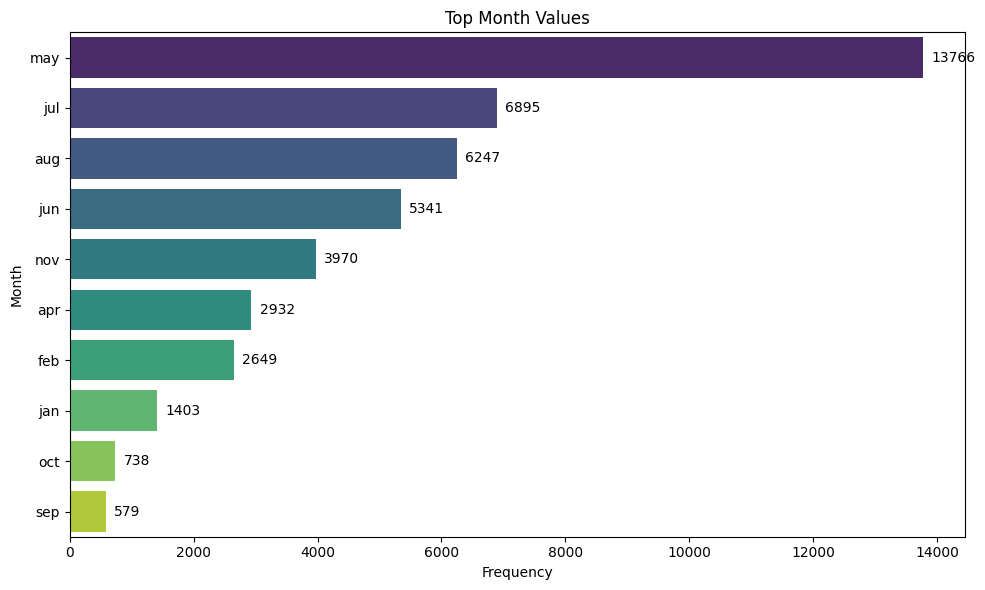

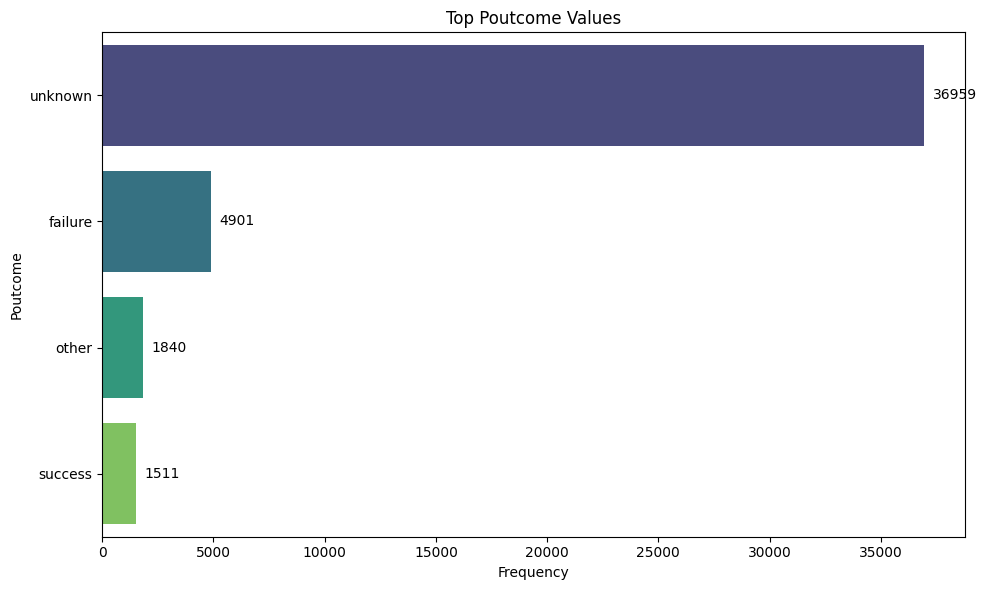

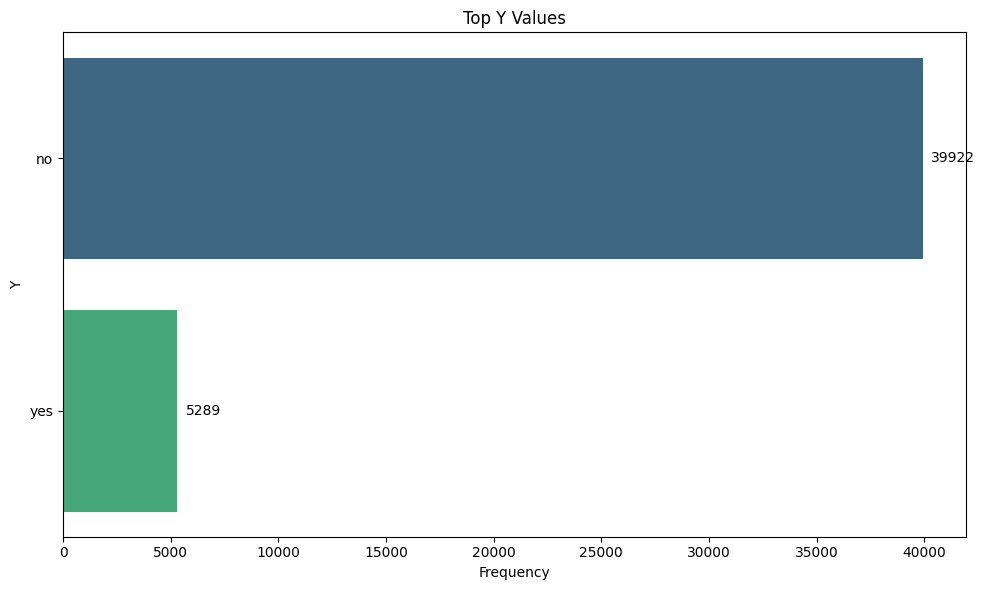

In [871]:
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Loop through non-numeric columns and create count plots for the top 10 most frequent values
for col in non_numeric_columns:
    top_10_values = df[col].value_counts().nlargest(10)  # Get the top 10 most frequent values
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    ax = sns.barplot(x=top_10_values.values, y=top_10_values.index, palette='viridis', ci=None)  # Create a bar plot with seaborn, ci=None to remove confidence intervals
    plt.xlabel('Frequency')  # Add x-axis label
    plt.ylabel(col.capitalize())  # Add y-axis label with capitalized column name
    plt.title(f'Top {col.capitalize()} Values')  # Add a descriptive title

    # Annotate each bar with its value
    for i, v in enumerate(top_10_values.values):
        ax.text(v + max(top_10_values.values) * 0.01, i, str(v), color='black', va='center')  # Adjust position of the annotation relative to the bar width

    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()

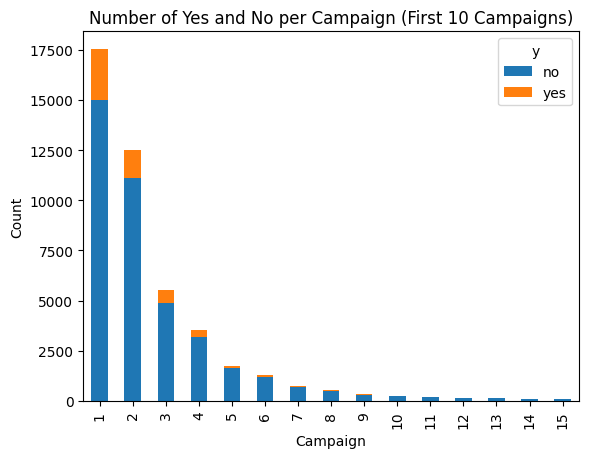

In [872]:
# Group the data by campaign and count the occurrences of "yes" and "no" in the "y" column, selecting only the first 10 campaigns
campaign_counts = df.groupby('campaign')['y'].value_counts().unstack().fillna(0).head(15)

# Plot the results
campaign_counts.plot(kind='bar', stacked=True)
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.title('Number of Yes and No per Campaign (First 10 Campaigns)')
plt.legend(title='y')
plt.show()


We can see that there's a lot of class imbalance (a lot of no and few yes)

## 3. Data Preprocessing

### 3.1 Removing null values and duplicates

In [873]:
df.dropna(inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
Id,,,,,,,,,,,,,,,,,
1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
1007,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
1011,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no


In [874]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [875]:
# Also could fill age and balance values with mean, job with mode
# df['age'].fillna(df['age'].mean(), inplace=True) # 12 values
# df['balance'].fillna(df['balance'].mean(), inplace=True) # 1 value
# df['job'].fillna(df['job'].mode()[0], inplace=True) # 3 values

### 3.2 Removing outliers
- Eliminate the age rows with age>100 and age<18

In [876]:
print(f'Size of the dataset before eliminate the rows of age : {df.shape}')
df = df[df['age']<=100]
df = df[df['age']>=18]
print(f'Size of the datase after eliminate the rows of age : {df.shape}')

Size of the dataset before eliminate the rows of age : (45197, 17)
Size of the datase after eliminate the rows of age : (45194, 17)


- Eliminate rows with 'previous' > 100

In [877]:
print(f'Size of the dataset before eliminate the rows of previous: {df.shape}')
df = df[df['previous']<=100] # We preserve the values that lower of 100
print(f'Size of the dataset after eliminate the rows of previous: {df.shape}')
df.head()

Size of the dataset before eliminate the rows of previous: (45194, 17)
Size of the dataset after eliminate the rows of previous: (45193, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
Id,,,,,,,,,,,,,,,,,
1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
1007,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
1011,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no


### 3.3 Encoding categorical variables

In [878]:
encoder = LabelEncoder()

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Loop through each categorical column and apply the LabelEncoder
for column in categorical_columns:
    # Fit the encoder on the column
    encoder.fit(df[column])
    # Encode the column
    df[column + '_encoded'] = encoder.transform(df[column])

# Additional encoding for the target variable 'y'
encoder.fit(df['y'])
df['y_encoded'] = encoder.transform(df['y'])

### 3.4 Encoding target variable

In [879]:
# Now target variable has the following labels
unique_values = df['y'].unique()
encoded_values = encoder.transform(unique_values)
for orig, enc in zip(unique_values, encoded_values):
    print(f"{orig}: {enc}")

no: 0
yes: 1


In [880]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,poutcome_encoded,y_encoded
Id,,,,,,,,,,,,,,,,,,,,,
1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,...,1,1,3,0,1,0,2,8,3,0
1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,...,11,2,3,0,0,0,2,8,3,0
1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,...,4,1,2,0,1,0,2,8,3,0
1007,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,...,4,2,2,0,1,1,2,8,3,0
1011,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,...,0,0,1,0,1,0,2,8,3,0


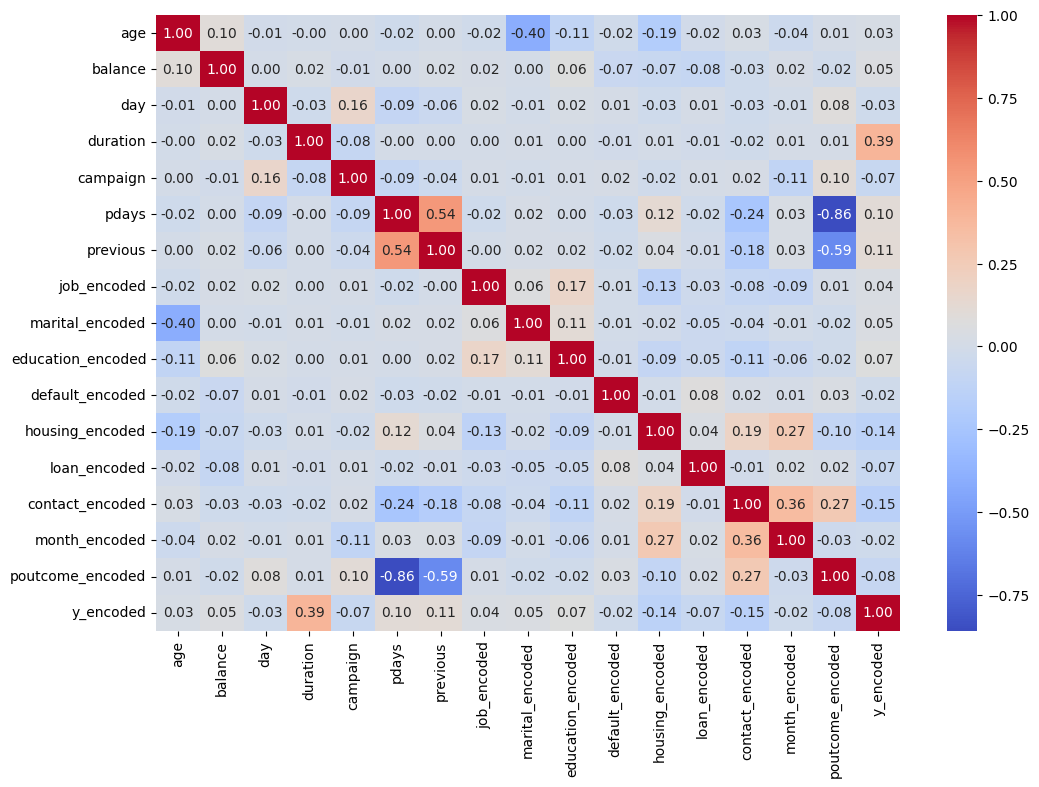

In [881]:
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr()  # Calculate correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # Create a heatmap with seaborn
plt.show()

### 3.5 Fixing class imbalance

#### 3.5.1 Normal data after preprocessing

In [882]:
# First we need to split dataset into train and test
X = df.drop(['y'], axis=1)
y = df['y_encoded']
columns_to_exclude = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y', 'y_encoded']

X = df.drop(columns_to_exclude, axis=1)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

#### 3.5.2 Under-sampling

In [883]:
# Implement undersampling to balance the classes
rus = RandomUnderSampler(random_state=100)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

#### 3.5.3 Over-sampling (SMOTE)

In [884]:
# Now we apply SMOTE to the training set 
sm = SMOTE(random_state=100)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution before SMOTE:
y_encoded
0    27920
1     3715
Name: count, dtype: int64
Class distribution after SMOTE:
y_encoded
0    27920
1    27920
Name: count, dtype: int64


## 4. Classification

### 4.1 Baseline model - Original Data (After preprocessing)

#### 4.1.1 Decision Tree

In [885]:
# Decision tree classifier
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

#### 4.1.2 Logistic Regression

In [886]:
# Logistic regression classifier
lr = LogisticRegression(random_state=100)
lr.fit(X_train, y_train)

LogisticRegression(random_state=100)

#### 4.1.3 Gradient Boosting

In [887]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=100)

#### 4.1.4 Random Forest

In [888]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

### 4.2 Model with the under-sampled data

#### 4.2.1 Decision Tree

In [889]:
dt_under = DecisionTreeClassifier(random_state=100)

# Train Decision Tree Classifer
dt_under.fit(X_train_under, y_train_under)

DecisionTreeClassifier(random_state=100)

#### 4.2.2 Logistic Regression

In [890]:
# Logistic regression classifier
lr_under = LogisticRegression(random_state=100)
lr_under.fit(X_train_under, y_train_under)

LogisticRegression(random_state=100)

#### 4.2.3 Gradient Boosting

In [891]:
# Gradient Boosting Classifier
gbc_under = GradientBoostingClassifier(random_state=100)
gbc_under.fit(X_train_under, y_train_under)

GradientBoostingClassifier(random_state=100)

#### 4.2.4 Random Forest

In [892]:
# Random Forest Classifier
rfc_under = RandomForestClassifier(random_state=100)
rfc_under.fit(X_train_under, y_train_under)

RandomForestClassifier(random_state=100)

### 4.3 Model with the over-sampled data

#### 4.3.1 Decision Tree

In [893]:
dt_over = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_over = dt_over.fit(X_train_resampled,y_train_resampled)

#### 4.3.2 Logistic Regression

In [894]:
# Logistic regression classifier
lr_over = LogisticRegression(random_state=100)
lr_over.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=100)

#### 4.3.3 Gradient Boosting

In [895]:
# Gradient Boosting Classifier
gbc_over = GradientBoostingClassifier(random_state=100)
gbc_over.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=100)

#### 4.3.4 Random Forest

In [896]:
# Random Forest Classifier
rfc_over = RandomForestClassifier(random_state=100)
rfc_over.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=100)

### 4.4 Comparison of models

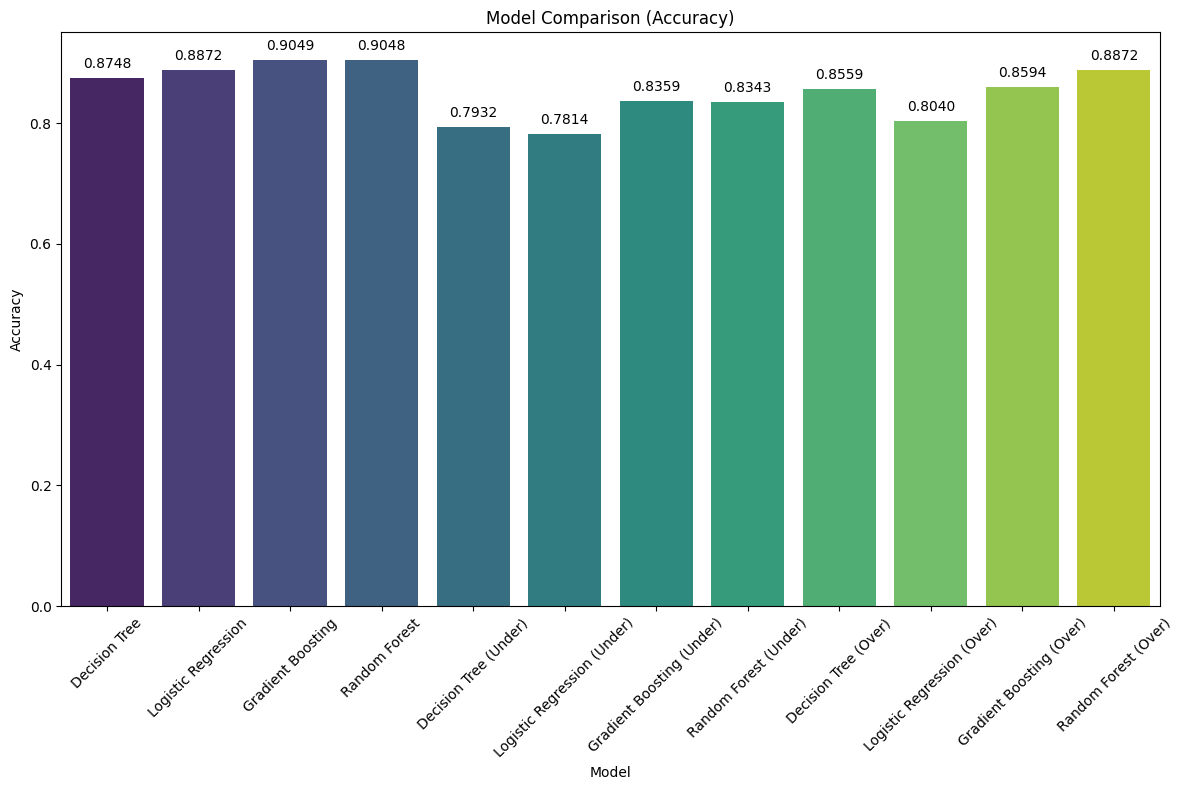

In [897]:
# Comparison of the models
models = [dt, lr, gbc, rfc, dt_under, lr_under, gbc_under, rfc_under, dt_over, lr_over, gbc_over, rfc_over]

# Create a list to store the results
results = []

# Loop through each model
for model in models:
    # Predict the target values
    y_pred = model.predict(X_test)
    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Append the results to the list
    results.append([accuracy, precision, recall, f1])

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Add the model names to the DataFrame
results_df['Model'] = ['Decision Tree', 'Logistic Regression', 'Gradient Boosting', 'Random Forest',
                       'Decision Tree (Under)', 'Logistic Regression (Under)', 'Gradient Boosting (Under)', 'Random Forest (Under)',
                       'Decision Tree (Over)', 'Logistic Regression (Over)', 'Gradient Boosting (Over)', 'Random Forest (Over)']

# Display the accuracy of each model
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Comparison (Accuracy)')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

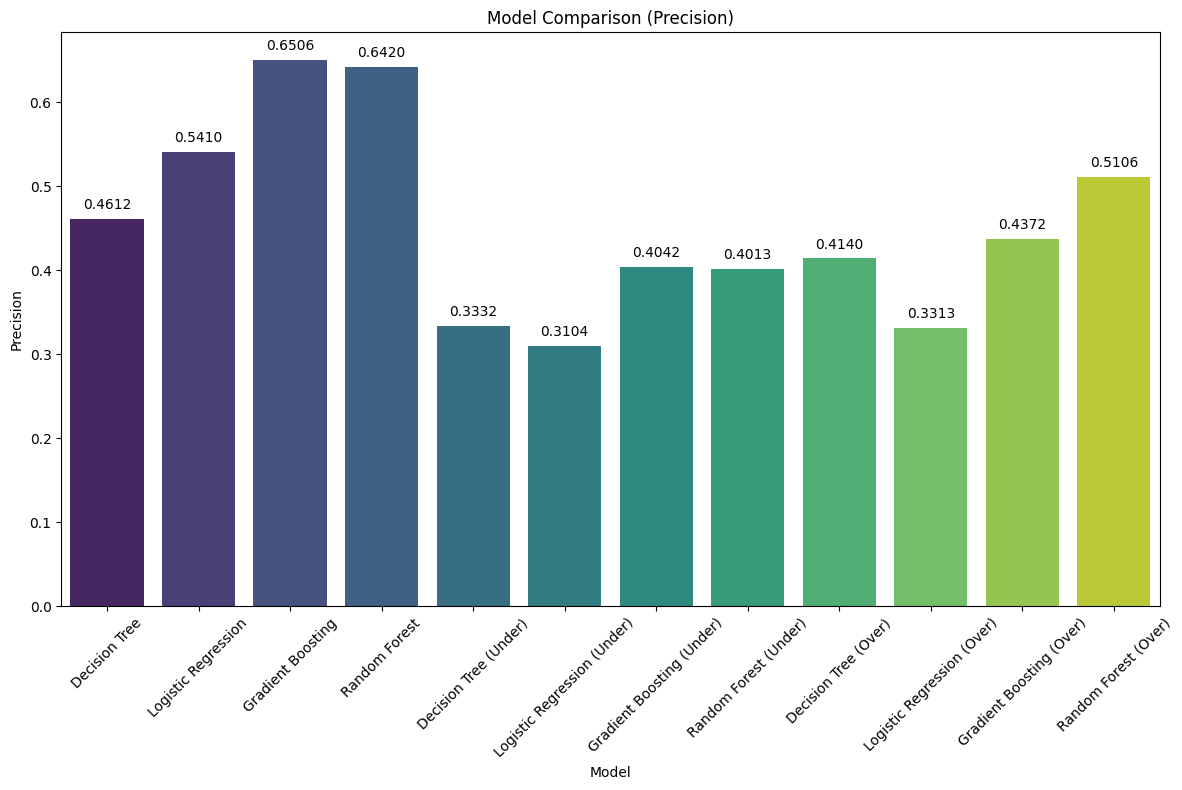

In [898]:
# Display the precision of each model
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=results_df, x='Model', y='Precision', palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Precision')
plt.title('Model Comparison (Precision)')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

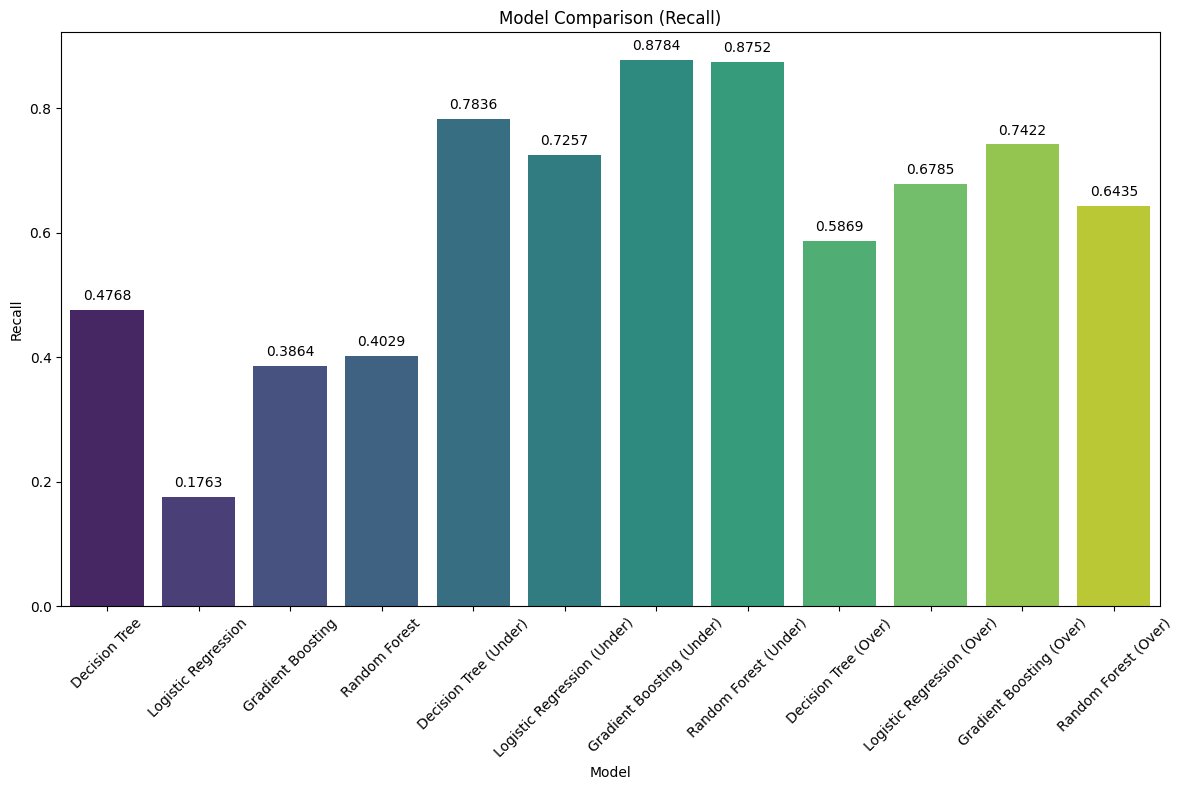

In [899]:
# Display the recall of each model
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=results_df, x='Model', y='Recall', palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Recall')
plt.title('Model Comparison (Recall)')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

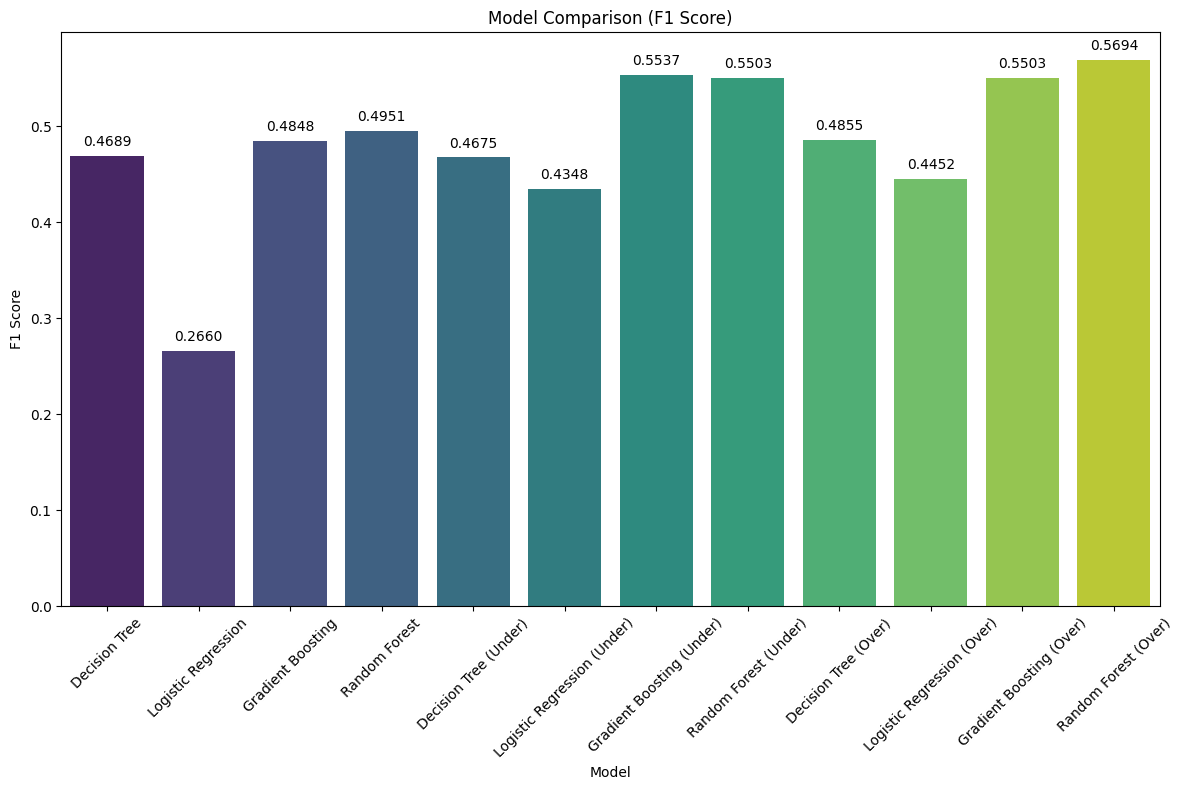

In [900]:
# Display the F1 score of each model
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=results_df, x='Model', y='F1 Score', palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('F1 Score')
plt.title('Model Comparison (F1 Score)')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

### 4.5 Hyperparameter tuning
The models that achieved the highest accuracy and precision were the one's that were trained with the original data without any type of sampling. Because of this, we will perform hyperparameter tuning on the models that were trained with the original data.

#### 4.5.1 Decision Tree hyperparameter tuning

In [901]:
# Decision Tree Classifier hyperparameters

dt_hyper = DecisionTreeClassifier(random_state=100)

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}

grid_search_dt = GridSearchCV(estimator=dt_hyper, param_grid=param_grid_dt, cv=5)

grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)



Best parameters for Decision Tree: {'criterion': 'entropy', 'splitter': 'random'}


#### 4.5.2 Logistic Regression hyperparameter tuning

In [902]:
# Logistic Regression Classifier hyperparameters
lr_hyper = LogisticRegression(random_state=100)

param_grid_lr = {
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'saga'],
}

grid_search_lr = GridSearchCV(estimator=lr_hyper, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'penalty': 'l1', 'solver': 'liblinear'}


#### 4.5.3 Gradient Boosting hyperparameter tuning

In [903]:
# Gradient Boosting Classifier hyperparameters
gbc_hyper = GradientBoostingClassifier(random_state=100)

param_grid_gbc = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}

grid_search_gbc = GridSearchCV(estimator=gbc_hyper, param_grid=param_grid_gbc, cv=5)
grid_search_gbc.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", grid_search_gbc.best_params_)

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}


#### 4.5.4 Random Forest hyperparameter tuning

In [904]:
# Random Forest Classifier hyperparameters

rfc_hyper = RandomForestClassifier(random_state=100)

param_grid_rfc = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, None]
}

grid_search_rfc = GridSearchCV(estimator=rfc_hyper, param_grid=param_grid_rfc, cv=5)
grid_search_rfc.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rfc.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}


### 4.6 Comparison of models after hyperparameter tuning

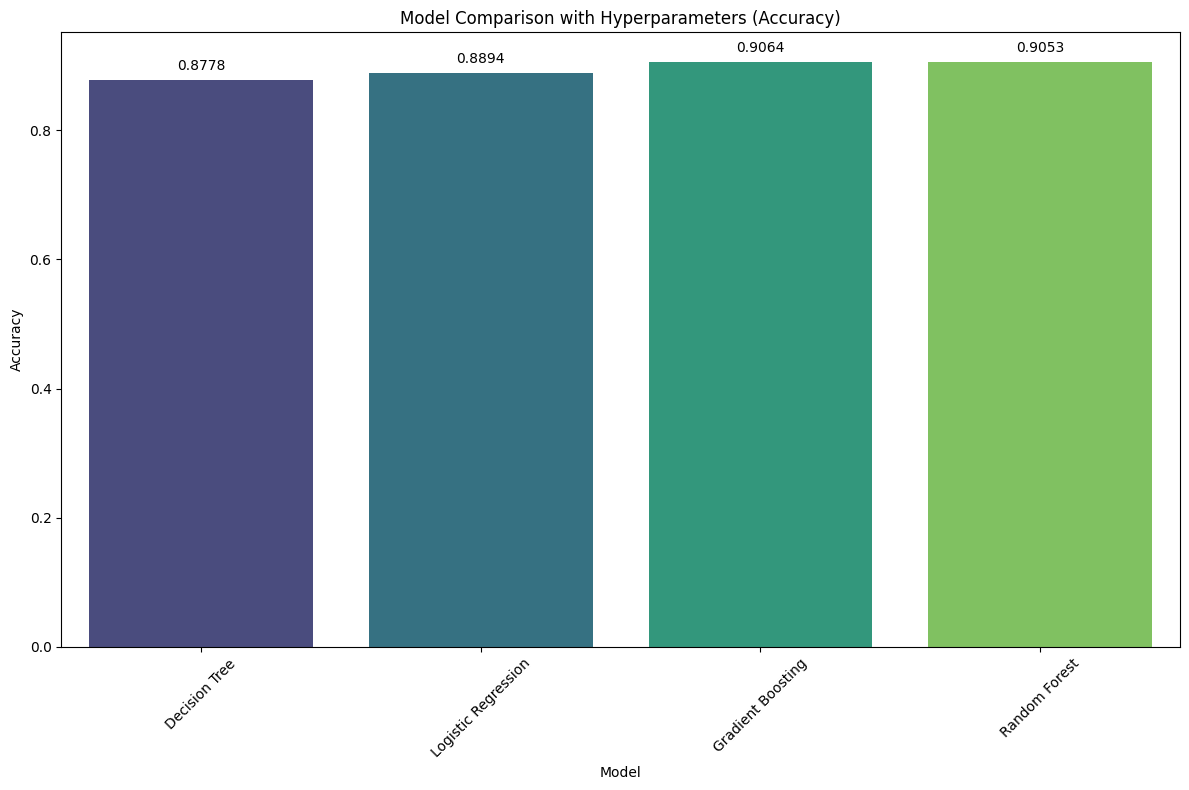

In [905]:
# Comparison of the models with hyperparameters
models_hyper = [grid_search_dt.best_estimator_, grid_search_lr.best_estimator_, grid_search_gbc.best_estimator_, grid_search_rfc.best_estimator_]

# Create a list to store the results
results_hyper = []

# Loop through each model
for model in models_hyper:
    # Predict the target values
    y_pred = model.predict(X_test)
    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Append the results to the list
    results_hyper.append([accuracy, precision, recall, f1])

# Create a DataFrame with the results
results_hyper_df = pd.DataFrame(results_hyper, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Add the model names to the DataFrame
results_hyper_df['Model'] = ['Decision Tree', 'Logistic Regression', 'Gradient Boosting', 'Random Forest']

# Display the accuracy of each model
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=results_hyper_df, x='Model', y='Accuracy', palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Comparison with Hyperparameters (Accuracy)')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

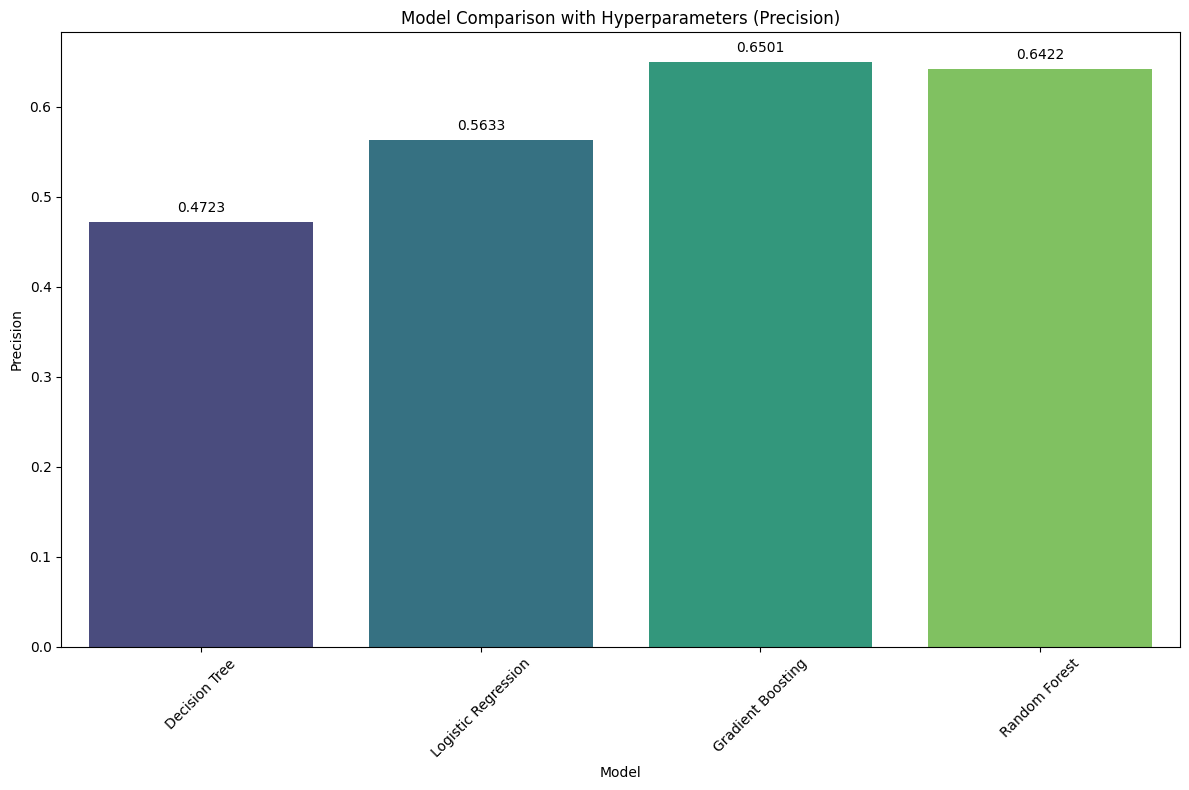

In [906]:
# Display the precision of each model
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=results_hyper_df, x='Model', y='Precision', palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Precision')
plt.title('Model Comparison with Hyperparameters (Precision)')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

## 5. Evaluation

In [907]:
def plot_confusion_matrix(cm, classes, model_name, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
